In [427]:
%matplotlib inline

import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer 
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [428]:
from lyricsgenius import Genius

In [429]:
import lyricsgenius
genius = lyricsgenius.Genius("cru7jNzbXG8jnWMdgKU6dWKqtaslJDLwKzB0lZR-NeFsy3u90pUX2CoWNDRrtenA")

### Task 1: Create a list of urls that contain lyrics for all the songs from Midnights

In [430]:
import pandas as pd  

In [431]:
# start off by creating a list of urls that contain lyrics for all the songs

In [432]:
urls = ['https://genius.com/Taylor-swift-lavender-haze-lyrics','https://genius.com/Taylor-swift-maroon-lyrics',
       'https://genius.com/Taylor-swift-anti-hero-lyrics', 'https://genius.com/Taylor-swift-snow-on-the-beach-lyrics',
       'https://genius.com/Taylor-swift-youre-on-your-own-kid-lyrics', 'https://genius.com/Taylor-swift-midnight-rain-lyrics',
       'https://genius.com/Taylor-swift-question-lyrics', 'https://genius.com/Taylor-swift-vigilante-shit-lyrics',
       'https://genius.com/Taylor-swift-bejeweled-lyrics', 'https://genius.com/Taylor-swift-labyrinth-lyrics',
       'https://genius.com/Taylor-swift-karma-lyrics', 'https://genius.com/Taylor-swift-sweet-nothing-lyrics',
       'https://genius.com/Taylor-swift-mastermind-lyrics']

### Task 2: Create a list of titles for all the songs from Midnights

In [433]:
# Accessing the title of the song from the url
import re 
titles = []
for url in urls:
    urltitle = re.search(r'https://genius.com/Taylor-swift-(.*?)-lyrics', url).group(1)
    # replace hyphens with space
    # Example: from 'lavender-haze' to 'lavender haze'
    # [A-z] = character from A - z (group 1)
    # \- = hyphen
    # [A-z] = character from A - z (group 2)
    # \1 \2 = space between group 1 and group 2
    urltitle = re.sub(r"([A-z])\-([A-z])", r"\1 \2", urltitle)
    titles.append(urltitle)
titles

['lavender haze',
 'maroon',
 'anti hero',
 'snow on the beach',
 'youre on your own kid',
 'midnight rain',
 'question',
 'vigilante shit',
 'bejeweled',
 'labyrinth',
 'karma',
 'sweet nothing',
 'mastermind']

In [434]:
# we can see that the lyrics have been scraped successfully from one link, now we need to
# repeat this for all the links
url = 'https://genius.com/Taylor-swift-maroon-lyrics'
maroonlyrics = genius.lyrics(song_url=url)
print(maroonlyrics)

TranslationsEspañolTürkçeFrançais中文СрпскиItalianoMagyarPortuguêsNederlandsУкраїнськаDeutsch日本語Maroon Lyrics[Verse 1]
When the morning came
We were cleaning incense off your vinyl shelf
'Cause we lost track of time again
Laughing with my feet in your lap
Like you were my closest friend
"How'd we end up on the floor, anyway?" you say
"Your roommate's cheap-ass screw-top rosé, that's how"
I see you every day now

[Chorus]
And I chose you
The one I was dancing with
In New York, no shoes
Looked up at the sky and it was
The burgundy on my t-shirt
When you splashed your wine into me
And how the blood rushed into my cheeks
So scarlet, it was
The mark thеy saw on my collarbone
The rust that grew bеtween telephones
The lips I used to call home
So scarlet, it was maroon
[Verse 2]
When the silence came
We were shaking, blind and hazy
How the hell did we lose sight of us again?
Sobbing with your head in your hands
Ain't that the way shit always ends?
You were standing hollow-eyed in the hallway
Car

### Task 3: Now scrape the lyrics from the list of urls

In [435]:
# scrapes lyrics from all songs in the urllist
lyricslist = []
for url in urls:
    lyrics = genius.lyrics(song_url=url)
    lyricslist.append(lyrics)

In [436]:
# we can see that the list contains lyrics 
# from all songs in the Midnights album
lyricslist

["TranslationsEspañolFrançaisPortuguês中文HrvatskiMagyarItalianoУкраїнськаTürkçeNederlandsLavender Haze Lyrics[Intro]\nMeet me at midnight\n\n[Verse 1]\nStaring at the ceiling with you\nOh, you don't ever say too much\nAnd you don't really read into\nMy melancholia\n\n[Pre-Chorus]\nI been under scrutiny (Yeah, oh, yeah)\nYou handle it beautifully (Yeah, oh, yeah)\nAll this shit is new to me (Yeah, oh, yeah)\n[Chorus]\nI feel the lavender haze creeping up on me\nSurreal\nI'm damned if I do give a damn what people say\nNo deal\nThe 1950s shit they want from me\nI just wanna stay in that lavender haze\n\n[Verse 2]\nAll they keep asking me (All they keep asking me)\nIs if I'm gonna be your bride\nThe only kinda girl they see (Only kinda girl they see)\nIs a one-night or a wife\n\n[Pre-Chorus]\nI find it dizzying (Yeah, oh, yeah)\nThey're bringing up my history (Yeah, oh, yeah)\nBut you weren't even listening (Yeah, oh, yeah)\n\n[Chorus]\nI feel the lavender haze creepin' up on me\nSurreal\nI

### Task 4: Add the lyrics and the title of the song from both lists to a data frame

In [437]:
# Creating a data frame with 2 columns
import pandas as pd
df_cols = ['title', 'lyrics','sentimentscore']

In [438]:
midnights_df = pd.DataFrame(columns=df_cols)

In [439]:
# empty dataframe with two columns
midnights_df

,title,lyrics,sentimentscore


In [440]:
midnights_df.columns

Index(['title', 'lyrics', 'sentimentscore'], dtype='object')

In [441]:
# Now, let's add the title and lyrics for all the songs from the Midnights album to this data frame
#df['new_col'] = mylist
midnights_df['lyrics'] = lyricslist

In [442]:
midnights_df['title'] = titles

In [443]:
midnights_df

,title,lyrics,sentimentscore
0,lavender haze,TranslationsEspañolFrançaisPortuguês中文Hrvatski...,NaN
1,maroon,TranslationsEspañolTürkçeFrançais中文СрпскиItali...,NaN
2,anti hero,TranslationsPortuguêsEspañolTürkçeFrançais中文Ne...,NaN
3,snow on the beach,TranslationsPortuguêsEspañol中文Magyarไทย / Phas...,NaN
4,youre on your own kid,TranslationsEspañolFrançaisHrvatskiTürkçe中文Mag...,NaN
5,midnight rain,TranslationsEspañol中文TürkçePortuguêsMagyarNede...,NaN
6,question,TranslationsEspañolPortuguêsTürkçeFrançais中文Ср...,NaN
7,vigilante shit,TranslationsEspañolTürkçeСрпскиPortuguêsFrança...,NaN
8,bejeweled,TranslationsTürkçeFrançaisСрпскиPortuguês中文Mag...,NaN
9,labyrinth,TranslationsFrançaisEnglishPortuguês中文MagyarNe...,NaN


In [444]:
midnights_df['lyrics'][0]

"TranslationsEspañolFrançaisPortuguês中文HrvatskiMagyarItalianoУкраїнськаTürkçeNederlandsLavender Haze Lyrics[Intro]\nMeet me at midnight\n\n[Verse 1]\nStaring at the ceiling with you\nOh, you don't ever say too much\nAnd you don't really read into\nMy melancholia\n\n[Pre-Chorus]\nI been under scrutiny (Yeah, oh, yeah)\nYou handle it beautifully (Yeah, oh, yeah)\nAll this shit is new to me (Yeah, oh, yeah)\n[Chorus]\nI feel the lavender haze creeping up on me\nSurreal\nI'm damned if I do give a damn what people say\nNo deal\nThe 1950s shit they want from me\nI just wanna stay in that lavender haze\n\n[Verse 2]\nAll they keep asking me (All they keep asking me)\nIs if I'm gonna be your bride\nThe only kinda girl they see (Only kinda girl they see)\nIs a one-night or a wife\n\n[Pre-Chorus]\nI find it dizzying (Yeah, oh, yeah)\nThey're bringing up my history (Yeah, oh, yeah)\nBut you weren't even listening (Yeah, oh, yeah)\n\n[Chorus]\nI feel the lavender haze creepin' up on me\nSurreal\nI'

In [445]:
# We can see that there are unnecessary characters like '\n' and unwanted sentences
# 1) TranslationsEspañolFrançaisPortuguês中文HrvatskiMagyarItalianoУкраїнськаTürkçeNederlands (at the beginning)
# 2) 33Embed (at the end)
# Unnecessary words for our analysis too like
# 1) [Intro] 
# 2) [Pre-Chorus]
# 3) [Chorus]
# 4) [Verse 2]
# 5) [Post-Chorus]
# 6) [Bridge]
# 7) [Outro]

### Task 5: Eliminate unnecessary characters, words and sentences for all song lyrics

In [446]:
for i in range(len(midnights_df)):
    # removing (digit)(digit)(Embed)
    if(midnights_df['lyrics'][i].endswith('Embed')):
        midnights_df['lyrics'][i] = midnights_df['lyrics'][i][:-7]
        
    # Remove anything that comes before "Lyrics" at the beginning of the string
    # the match is going to start at the beginning of the string ^. 
    # And then you match any character .+?, until you see Lyrics.
    midnights_df['lyrics'][i] = re.sub(r"^.+?(?=Lyrics)", "", midnights_df['lyrics'][i])
        
    # get rid of any sentence that begins with 'See Taylor'
    # matches any character except for a terminator ".*"
    midnights_df['lyrics'][i] = re.sub("See Taylor.*", '', midnights_df['lyrics'][i], re.DOTALL).strip()
    
    # get rid of any sentence that begins with '['
    # this gets rid of [Chorus], [Outro] and so on..
    midnights_df['lyrics'][i] = re.sub("\[.*", '', midnights_df['lyrics'][i], re.DOTALL).strip()
        
    # gets rid of the word 'Lyrics'
    midnights_df['lyrics'][i] = midnights_df['lyrics'][i].replace("Lyrics", '')
    
    # removing punctuations and unnecessary characters
    midnights_df['lyrics'][i] = midnights_df['lyrics'][i].replace("?", " " )
    midnights_df['lyrics'][i] = midnights_df['lyrics'][i].replace("!", " " )  
    midnights_df['lyrics'][i] = midnights_df['lyrics'][i].replace("(", " " )  
    midnights_df['lyrics'][i] = midnights_df['lyrics'][i].replace(")", " " ) 
    midnights_df['lyrics'][i] = midnights_df['lyrics'][i].replace("'", "")
    midnights_df['lyrics'][i] = midnights_df['lyrics'][i].replace(",", " ")
    
    # Replace '\n' with space
    midnights_df['lyrics'][i] = midnights_df['lyrics'][i].split('\n')
    midnights_df['lyrics'][i] = " ".join(midnights_df['lyrics'][i])

### Task 6: Create a word cloud for the Midnights Album

In [447]:
# Before creating a word cloud, we need to eliminate stop words.
# Stop words are words like 'and', 'the', etc.
# These words aren't important and informative for world cloud analysis 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nandhinishankar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

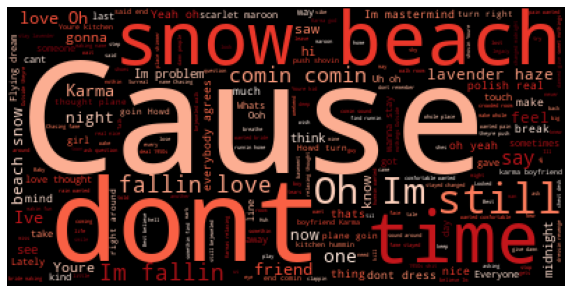

In [448]:
# Before creating a word cloud, we need to eliminate stop words.
# Stop words are words like 'and', 'the', etc.
# These words aren't important and informative for world cloud analysis 

import wordcloud
from wordcloud import WordCloud, STOPWORDS
# Creating a stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
midnights_text = " ".join(word for word in midnights_df.lyrics)

# we can use a wordcloud to see which words were 
# frequently used in the reviews
wordcloud_taylor = WordCloud(stopwords=stopwords, colormap="Reds").generate(midnights_text)
plt.figure(figsize=(10,6))
plt.clf()
plt.imshow(wordcloud_taylor)
plt.axis('off')
plt.show()

We can see that words like "cause", "snow", "beach" and "time" seem to stand out. We can also see words like "feel", "love" and "fallin" standing out. This can give us some context about the theme of the album. Midnights is an album that seems to be about the journey of love. 
It would be interesting to dig deeper into the sentiment of the lyrics. 

### Task 7: Sentiment Analysis of Lyrics 

In [449]:
pip install vaderSentiment


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: /Users/nandhinishankar/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [450]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [451]:
# Function that calculates the sentiment score 

def sentiment_calculator(text):
    # Running VADER on the text
    midnights_scores = sentimentAnalyser.polarity_scores(text)
    # Extracting the overall compound scores
    compound_score = midnights_scores['compound']
    # Returning the compound score
    # the sum of positive, negative and neutral scores
    return compound_score

In [452]:
# Apply the function to every row in the "lyrics" column and add results to the "sentimentscore" column
midnights_df['sentimentscore'] = midnights_df['lyrics'].apply(sentiment_calculator)

In [453]:
midnights_df

,title,lyrics,sentimentscore
0,lavender haze,Meet me at midnight Staring at the ceiling ...,-0.7351
1,maroon,When the morning came We were cleaning incens...,-0.9480
2,anti hero,I have this thing where I get older but just...,-0.9954
3,snow on the beach,One night a few moons ago I saw flecks of wh...,0.9980
4,youre on your own kid,Summer went away still the yearning stays I...,0.9941
5,midnight rain,Rain He wanted it comfortable I wanted that ...,0.9972
6,question,I remember Good girl sad boy Big city wro...,0.9960
7,vigilante shit,Draw the cat eye sharp enough to kill a man Y...,-0.8978
8,bejeweled,Baby love I think Ive been a little too kind...,0.9948
9,labyrinth,"""It only hurts this much right now"" Was what ...",0.9942


### Task 8: Visualize the results 

Text(0.5, 1.0, 'Sentiment Scores of Songs from the Midnights Album')

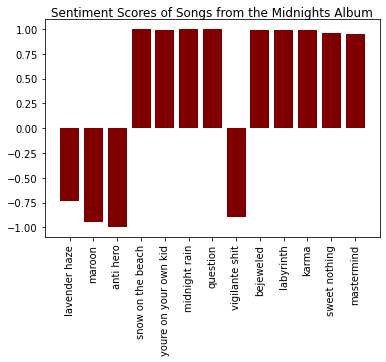

In [454]:
import matplotlib.pyplot as plt 
x = midnights_df['title']
y = midnights_df['sentimentscore']
plt.bar(x, y, color='maroon') 
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 90)
plt.title(label='Sentiment Scores of Songs from the Midnights Album', 
          fontweight=10, 
          pad='2.0')

We can see that most of the songs have overall sentiment scores that are positive. These scores are very similar, they are an indicator of Taylor Swift's happiness. I would personally like to thank Joe Alwyn, he is a gentleman who does everything in his power to keep miss Swift happy. 

However, we do have a few songs that have overall negative sentiment scores, with Anti-Hero having the highest negative sentiment score, the value seems to fall between -0.9 and -1.0. This isn't surprising at all because anti-hero is a very self deprecating song. We can also see that 'vigilante sh*t' has an extremely high negative sentiment score. I mean, this is a song that's about taking revenge on men, so it's expected. 

Overall, Midnights seems to be a more positive album. Which is great to see!!